# Final Project Data Classification

```
Nama Ketua : 1. Zakiah Intan Maula (2100015043) ([Bayes] clasification)
             2. Khusnul Khotimah (2100015009) ([RF] clasification)
             3. Sona Regina Salsabila (2100015053) ([SVM] clasification)
             4. Dewi Rismawati (2100015008) ([MLR] clasification)
             5. Badzliana Aqmar Suris (2100015016) ([KNN] clasification)
             
```

# Import Librarry

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Data

In [ ]:
df = pd.read_csv('/content/Dataset_Clasification.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Preprocessing Data

In [ ]:
df.shape 

(1599, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
x = df.drop(columns=['quality'], axis = 1)
y = df['quality']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=8)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (1279, 11) (1279,)
Test set: (320, 11) (320,)


# Model

## [SVM] Model ke 1

In [ ]:
from sklearn import svm
model = svm.SVC(kernel = 'linear')

#Training the SVM Model
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

### Evaluasi Model 1

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.80      0.64      0.71       171
           6       0.61      0.53      0.57       149
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0

    accuracy                           0.59       320
   macro avg       0.24      0.20      0.21       320
weighted avg       0.71      0.59      0.65       320

Accuracy:  0.590625


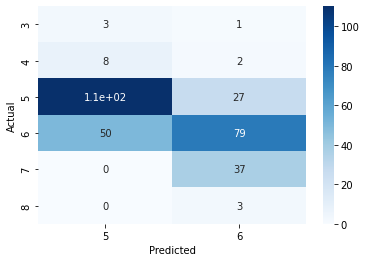

In [ ]:
import seaborn as sn

from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, cmap=plt.cm.Blues)

import matplotlib.pyplot as plt
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

## [KNN] Model ke 2

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=40, weights='distance')
KNN_model.fit(x_train,y_train)
y_pred=KNN_model.predict(x_test)

### Evaluasi Model 2

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.75      0.66      0.70       157
           6       0.67      0.61      0.64       142
           7       0.46      0.81      0.59        21
           8       0.00      0.00      0.00         0

    accuracy                           0.65       320
   macro avg       0.31      0.35      0.32       320
weighted avg       0.70      0.65      0.67       320

Accuracy:  0.646875


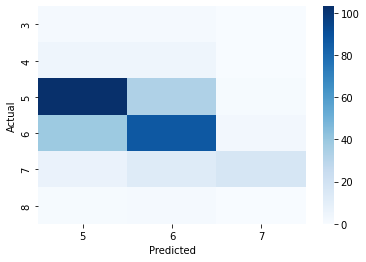

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=False, cmap=plt.cm.Blues)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

# [Bayes] Model ke 3

In [ ]:
# Gaussian
from sklearn.naive_bayes import GaussianNB

clas = GaussianNB()

clas.fit(x_train, y_train)

y_predd = clas.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predd))

0.578125


## Evaluasi Model 3

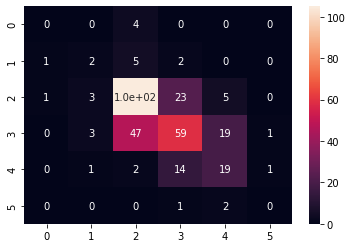

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predd)
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predd))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.22      0.20      0.21        10
           5       0.64      0.77      0.70       137
           6       0.60      0.46      0.52       129
           7       0.42      0.51      0.46        37
           8       0.00      0.00      0.00         3

    accuracy                           0.58       320
   macro avg       0.31      0.32      0.32       320
weighted avg       0.57      0.58      0.57       320



#[Multivariat Linier Regression] Model ke 4

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import r2_score


In [ ]:
# dengan sklearn
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)

print('Intercept: \n', lin_reg.intercept_)
print('Coefficients: \n', lin_reg.coef_)

Intercept: 
 29.882304435595007
Coefficients: 
 [ 3.40e-02 -9.90e-01 -1.41e-01  1.51e-02 -1.16e+00  5.31e-03 -3.34e-03
 -2.62e+01 -3.77e-01  9.37e-01  2.76e-01]


In [ ]:
# dengan model statistik
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Fri, 30 Dec 2022   Prob (F-statistic):          1.79e-145
Time:                        10:37:25   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652 

## Evaluasi model 4

-0.9149578082661822
Accuracy:  0.3588548729210793


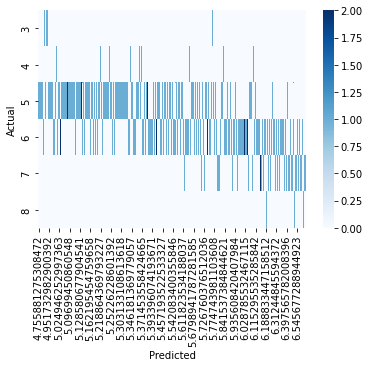

In [ ]:
# Checking various accuracy:

print(metrics.r2_score(y_pred, y_test))

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=False, cmap=plt.cm.Blues)

print('Accuracy: ',metrics.r2_score(y_test, y_pred))
plt.show()

In [ ]:
lin_reg.score(x_test, y_test)

0.3588548729210793

#[Random Forest] Model ke 5

In [ ]:
x = df.drop(columns=['quality'], axis = 1)
y = df['quality']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_3 = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state=0,)
model_3.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150, random_state=0)

##Evaluasi Model

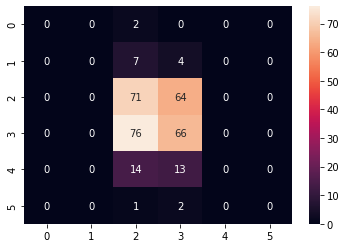

In [ ]:
from sklearn.metrics import confusion_matrix
coma = confusion_matrix(y_test, y_pred)
sns.heatmap(coma, annot=True)
plt.savefig('confusion.png')

In [ ]:
from sklearn.metrics import classification_report
y_pred = model_3.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.75      0.85      0.80       135
           6       0.75      0.73      0.74       142
           7       0.54      0.52      0.53        27
           8       0.00      0.00      0.00         3

    accuracy                           0.73       320
   macro avg       0.34      0.35      0.34       320
weighted avg       0.69      0.73      0.71       320



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Kesimpulan

Perbandingan hasil evaluasi dari setiap model

|Model|Metriks evaluasi1|
|---|---|
|SVM|0.59|
|KNN| 0.65 |
|Bayes|0.578|
|MLR|0.358|
|RF|0.73|

Lalu berikan penjelasan.

Setelah dilakukan analisis data dengan menggunakan lima metode klasifikasi, yaitu SVM (*support vector machine*), KNN (*k-nearest neighbor*), *Gaussian Naive Bayes*, MLR (*multivariate linear regression*), dan RF (*random forest*) diperoleh kesimpulan bahwa pengklasifikasian data diatas lebih akurat jika menggunakan metode RF atau *random forest*. Nilai akurasi yang didapatkan jika data dianalisis dan diklasifikasikan berdasarkan metode RF adalah 0.73 atau 73%.